In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("soc1.csv",header=0,index_col=0)

In [3]:
df.head()

,Voltage,Current,Full charge Capacity,Remaining Capacity,Cell 1 Voltage,Cell 2 Voltage,Relative State of Charge
TimeStamp,,,,,,,
2021-08-16 16:59:15.766,8472,0,4888,4888,4220,4251,100
2021-08-16 16:59:17.768,8472,0,4888,4888,4220,4251,100
2021-08-16 16:59:19.766,8472,0,4888,4888,4220,4251,100
2021-08-16 16:59:21.766,8471,0,4888,4888,4220,4251,100
2021-08-16 16:59:23.766,8471,0,4888,4888,4220,4251,100


In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df)
df = pd.DataFrame(df0, columns=df.columns)
df.head()

,Voltage,Current,Full charge Capacity,Remaining Capacity,Cell 1 Voltage,Cell 2 Voltage,Relative State of Charge
0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
1,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
2,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
3,0.999321,1.0,1.0,1.0,1.0,1.0,1.0
4,0.999321,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
X_data=df.drop(['Relative State of Charge'],axis=1)
y_data=df['Relative State of Charge']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,random_state = 1)


In [6]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1202, 6)
y_train (1202,)
X_test (301, 6)
y_test (301,)


In [7]:
# Fit regression model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model = rf.fit(X_train, y_train)

In [8]:
y_train_predict=model.predict(X_train)

In [9]:
y_train = np.array(y_train)

Text(0.5, 1.0, 'Train Data')

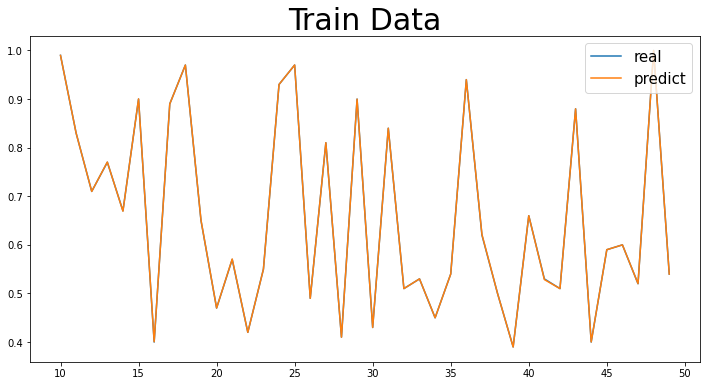

In [10]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[10:50,0].plot(figsize=(12,6))
draw.iloc[10:50,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') 

In [11]:
y_test_predict=model.predict(X_test)

In [12]:
y_test = np.array(y_test)

Text(0.5, 1.0, 'Test Data')

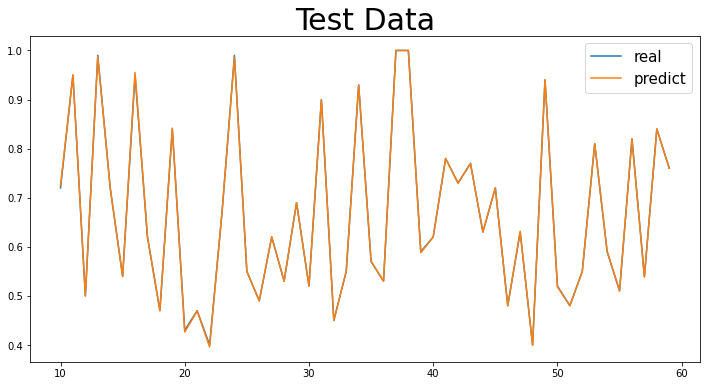

In [13]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[10:60,0].plot(figsize=(12,6))
draw.iloc[10:60,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30')

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
print('MAE Train')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )

print('MAE Test')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )


MAE Train
0.00039683860232992183
3.540249584026666e-06
MAE Test
0.0007501661129572757
2.9815282392030383e-06


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,random_state = 1)


In [16]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1202, 6)
y_train (1202,)
X_test (301, 6)
y_test (301,)


In [18]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [19]:
ridge_reg.score(X_test,y_test)

0.9654283275554943

In [20]:
y_train_predict=ridge_reg.predict(X_train)

In [21]:
y_train = np.array(y_train)

Text(0.5, 1.0, 'Train Data')

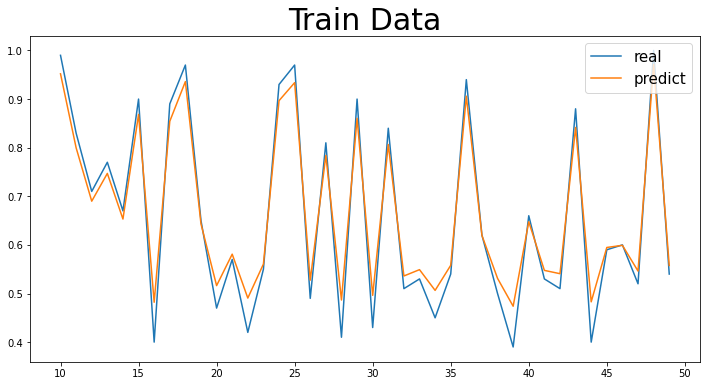

In [22]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[10:50,0].plot(figsize=(12,6))
draw.iloc[10:50,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') 

In [23]:
y_test_predict=ridge_reg.predict(X_test)

In [24]:
y_test = np.array(y_test)

Text(0.5, 1.0, 'Test Data')

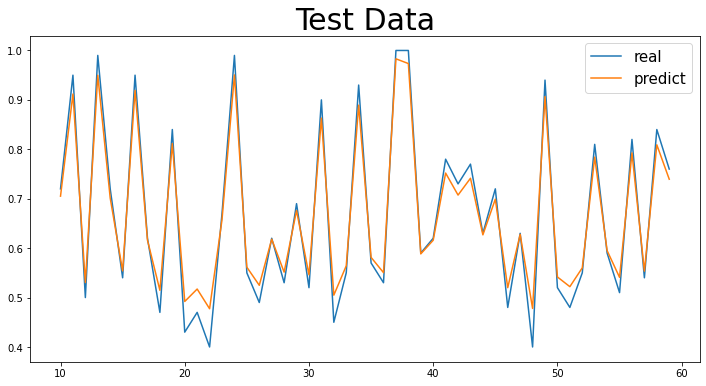

In [25]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[10:60,0].plot(figsize=(12,6))
draw.iloc[10:60,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30')

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
print('MAE Train')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )

print('MAE Test')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )

MAE Train
0.031407176325639115
0.001781746321720706
MAE Test
0.028298826224959182
0.0011313891464217382


In [27]:
#RMSE - 0.3316